In [5]:
!pip install biopython

In [6]:
#dataset of 1186 AF structure predictions of the 73 wildtypes (out 0f 78 total in Novozyme training set)

#save mmcif files from https://www.kaggle.com/datasets/shlomoron/train-wildtypes-af/data as pdb files

!pip install biopython
from Bio.PDB.MMCIFParser import MMCIFParser
from Bio.PDB import PDBParser
from Bio.PDB.PDBIO import PDBIO
import os

for file in os.listdir("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/cif"):
    filename=os.path.join("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/cif",file)
    name=file.split(".")[0]
    pdbname=name+".pdb"
    p=MMCIFParser()
    struc=p.get_structure(name, filename)
    io=PDBIO()
    io.set_structure(struc)
    io.save(os.path.join("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/pdb",pdbname))


In [1]:
# read csv
import pandas as pd
#This is the updates training set of Novozyme taken from: https://www.kaggle.com/datasets/shlomoron/train-wildtypes-af/data?select=train_wildtype_groups.csv
readit=pd.read_csv("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/train_wildtype_groups.csv")
#count how many rows have same value for ph
wtdf=readit["wildtype"].value_counts()
print(wtdf)

MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSELDKAIGRNCNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRCALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSIWYNQTPNRAKRVITTFRTGTWDAYKNL                                                                                                                                                                                                                                                                                                                708
MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSCLVLTLVVVSSLSSSANASQTDNGVNRSGSEDPTVYSATSTKKLHKEPATLIKAIDGDTVKLMYKGQPMTFRLLLVDTPETKHPKKGVEKYGPEASAFTKKMVENAKKIEVEFDKGQRTDKYGRGLAYIYADGKMVNEALVRQGLAKVAYVYKPNNTHEQHLRKSEAQAKKEKLNIWSEDNADSGQ                                                                                                                                                                                                                                             273
MNQSVSSLPEKDIQYQLHPYTNARLHQELGPLIIERGEGIYVYDDQGKGYIEAMAG

An issue with this dataset is that different PH values are associated with sequences.

7.00    897
7.50    395
8.00    365
3.00    245
2.70    163
       ... 
5.28      1
3.19      1
2.98      1
3.21      1
8.60      1
Name: pH, Length: 102, dtype: int64
1.99
11.0


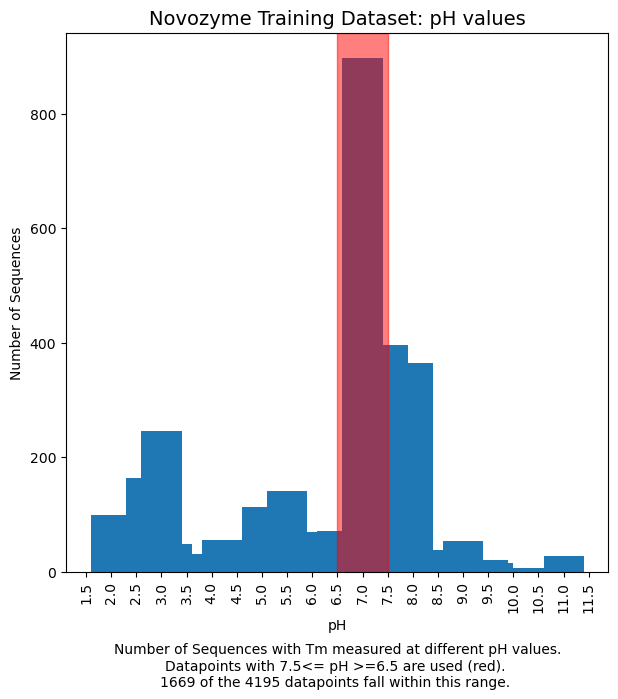

(4195, 8)
   seq_id                                   protein_sequence   pH  \
0   18023  MNAFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   
1   18061  MNCFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   
2   18062  MNCFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   
3   18072  MNDFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   
4   18113  MNEFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   

        data_source    tm    x  group  \
0  10.1038/334406a0  62.9  164      0   
1               NaN  65.0  164      0   
2               NaN  64.7  164      0   
3  10.1038/334406a0  56.2  164      0   
4  10.1038/334406a0  59.0  164      0   

                                            wildtype  
0  MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  
1  MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  
2  MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  
3  MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  
4  MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL... 

<Figure size 640x480 with 0 Axes>

In [8]:
# read csv
import pandas as pd
import numpy as np
#This is the updates training set of Novozyme taken from: https://www.kaggle.com/datasets/shlomoron/train-wildtypes-af/data?select=train_wildtype_groups.csv
wt_group_df=pd.read_csv("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/train_wildtype_groups.csv")
#count how many rows have same value for ph

df=wt_group_df["pH"].value_counts()
print(df)
print(min(df.index))
print(max(df.index))
#make graph of pH values
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
plt.tight_layout()
plt.bar(df.index,df.values)
plt.xlabel("pH")
plt.ylabel("Number of Sequences")
plt.title("Novozyme Training Dataset: pH values", fontsize=14)
plt.xticks(np.arange(1.5, 12, 0.5))
plt.xticks(rotation=90)
#higlight pH 6.5 to pH 7.5 in red
plt.axvspan(6.5, 7.5, color='red', alpha=0.5)
txt="""Number of Sequences with Tm measured at different pH values.
Datapoints with 7.5<= pH >=6.5 are used (red). 
1669 of the 4195 datapoints fall within this range. """
plt.text(6.5, -200, txt, fontsize=10, ha="center")
plt.show()
plt.savefig("/home/lilian/TCR_Graphs/docs/graphs/ph_values_Novozyme_train.png",dpi=300)

print(wt_group_df.shape)

#keep only rows with ph=7
#wt_group_df=wt_group_df[wt_group_df["pH"]==7]
wt_group_df=wt_group_df[wt_group_df["pH"]>=6.5]
wt_group_df=wt_group_df[wt_group_df["pH"]<=7.5]

#index reset
wt_group_df=wt_group_df.reset_index(drop=True)
print(wt_group_df.head())
#write to file
wt_group_df.to_csv("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/train_wildtype_groups_ph_6.5_7.5.csv", header=True, index=True)


897 sequences with Tm at pH7. These will be encoded and a model is trained on predicting Tm. 

In [2]:
# read csv
import pickle
import pandas as pd
wt_group_df=pd.read_csv("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/train_wildtype_groups_ph_6.5_7.5.csv", index_col=None, header=0)
#count how many rows have same value for ph
df=wt_group_df["pH"].value_counts()
#keep only rows with ph=7
#wt_group_df=wt_group_df[wt_group_df["pH"]==7]
wt_group_df=wt_group_df[wt_group_df["pH"]>=6.5]
wt_group_df=wt_group_df[wt_group_df["pH"]<=7.5]
wt_group_df.columns


df=wt_group_df[["seq_id","protein_sequence", "tm"]]
df=df.set_index('seq_id')
seq_df=df[["protein_sequence"]]
tm_df=df[["tm"]]   

tm_dict=tm_df.T.to_dict("list")  
tm_dict = { str(k): v for k, v in tm_dict.items() }

dict=seq_df.T.to_dict("list")
dict = { str(k): v for k, v in dict.items() }
dict = { k: v[0] for k, v in dict.items() }
protein_seq_list=list(dict.items())
seq_id_list=list(dict.keys())
with open("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/list_of_sequences.pkl", 'wb') as f:
    pickle.dump(protein_seq_list, f)
with open("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/list_of_tm.pkl", 'wb') as f:
    pickle.dump(tm_dict, f)

run esm_encoder to generate csv file

In [5]:
import torch
import esm
import gc
from esm_encoder import embed

!python3 esm_encoder.py "/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/list_of_sequences.pkl" '/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/seq_representations_ph6575.csv' "/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/list_of_tm.pkl"


Using cache found in /home/lilian/.cache/torch/hub/facebookresearch_esm_main
18023
18061
18062
18072
18113
18172
18217
18300
18308
18310
18320
18322
18340
18345
18347
18348
18354
18356
18357
18362
18363
18370
18402
18404
18410
18419
18426
18429
18431
18435
18436
18438
18439
18441
18444
18445
18448
18451
18452
18460
18461
18468
18470
18476
18477
18480
18481
18507
18508
18524
18595
18596
18601
18602
18619
18620
18622
18625
18628
18660
18661
18682
18685
18714
18731
18736
18737
18738
18739
18770
18772
18797
18823
18824
18834
18847
18927
18931
18933
18937
18938
18941
18951
18957
18964
18969
18972
18974
18976
18978
18979
18981
18982
18983
18990
18992
19022
19023
19038
19040
19241
19300
19773
19852
19900
19949
19965
16542
16554
16555
16559
16561
16576
16578
16581
16582
16584
16585
16588
16596
16598
16602
16606
16617
16618
16634
16636
16641
16643
16644
16646
16651
16653
16657
16658
16660
16662
16664
16665
16689
16690
16692
16693
16697
16698
16702
16704
16705
16706
16711
16713
16716
16717
16719

In [10]:
#read csv to df
import pandas as pd
import numpy as np
import torch
import ast
#tensor of length 1280 per sequence
esm_df=pd.read_csv("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/seq_representations_ph6575.csv",sep=";", header=None) 
esm_df.columns = ["id", "tm","esm"] 
for i in esm_df.index:
    esm_df["esm"][i]=np.array(ast.literal_eval(esm_df["esm"][i]))
print(esm_df.head())  

/tmp/ipykernel_1234933/4273780204.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esm_df["esm"][i]=np.array(ast.literal_eval(esm_df["esm"][i]))


      id    tm                                                esm
0  18023  62.9  [0.08105135709047318, -0.14088843762874603, -0...
1  18061  65.0  [0.07946237921714783, -0.14203152060508728, -0...
2  18062  64.7  [0.07946237921714783, -0.14203152060508728, -0...
3  18072  56.2  [0.08699294179677963, -0.13731181621551514, -0...
4  18113  59.0  [0.08887691050767899, -0.1366855800151825, -0....


In [11]:
import pickle
#transform esm dataframes to one dataframe with 1280 columns for PCA analysis
new_esm_df=pd.DataFrame(columns=[str(i) for i in range(1,len(esm_df["esm"][i])+1)]+["id", "tm"])
for i in esm_df.index:
    array_esm=list(esm_df["esm"][i])+[esm_df["id"][i],esm_df["tm"][i]]
    for a in range(len(array_esm)):
        new_esm_df.loc[i] = array_esm
print(new_esm_df.head())
print(new_esm_df.shape)
#write  to file as pickle
with open("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/seq_representations_ph6575_fullesm.csv", 'wb') as f:
    pickle.dump(new_esm_df, f)



          1         2         3         4         5         6         7  \
0  0.081051 -0.140888 -0.024027  0.073594 -0.177288  0.012133  0.071402   
1  0.079462 -0.142032 -0.023219  0.074079 -0.179208  0.015475  0.069047   
2  0.079462 -0.142032 -0.023219  0.074079 -0.179208  0.015475  0.069047   
3  0.086993 -0.137312 -0.020412  0.071302 -0.174607  0.011103  0.066139   
4  0.088877 -0.136686 -0.019851  0.071763 -0.175287  0.010922  0.065147   

          8         9        10  ...      1273      1274      1275      1276  \
0 -0.210401 -0.118104  0.062028  ... -0.110395  0.079891  0.046398  0.103387   
1 -0.208284 -0.117104  0.064740  ... -0.109563  0.078257  0.046352  0.105464   
2 -0.208284 -0.117104  0.064740  ... -0.109563  0.078257  0.046352  0.105464   
3 -0.208098 -0.114807  0.055610  ... -0.106136  0.076631  0.046376  0.107498   
4 -0.210134 -0.113660  0.056955  ... -0.107356  0.075317  0.046189  0.105423   

       1277      1278      1279      1280       id    tm  
0  0.0191

In [ ]:
import plotly.express as px
import plotly  
from sklearn.decomposition import PCA
import kaleido
pca = PCA(n_components=2)
components = pca.fit_transform(new_esm_df[[str(i) for i in range(1,len(esm_df["esm"][i])+1)]])
pca_df=pd.DataFrame(components, columns=["PCA1","PCA2"])
#merge pca_df with esm_df
pca_df=pd.concat([pca_df,esm_df[["id", "tm"]]],axis=1)
print(pca_df.head())
fig = px.scatter(pca_df, x="PCA1", y="PCA2", color="tm",title="PCA of Novozyme ESM encoding")


#description:
"""PCA of Novozyme Training data sequences with Tm measured at pH >=6.5, <=7.5. Sequences were encoded with ESM2 and principal components one and two were plotted.
The data points are colored according to the Tm value of sequences."""
fig.show()

#fig.write_image("/home/lilian/TCR_Graphs/docs/graphs/PCA_Novozyme_train_ph_6.5_7.5.png")

#do 3d graph of three PCA
import plotly.express as px
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
components = pca.fit_transform(new_esm_df[[str(i) for i in range(1,len(esm_df["esm"][i])+1)]])
pca_df=pd.DataFrame(components, columns=["PCA1","PCA2","PCA3"])
#merge pca_df with esm_df
pca_df=pd.concat([pca_df,esm_df[["id", "tm"]]],axis=1)
fig = px.scatter_3d(pca_df, x="PCA1", y="PCA2", z="PCA3", color="tm",title="PCA of Novozyme ESM encoding",size_max=1.5,opacity=0.7)
fig.show()
#fig.write_image("/home/lilian/TCR_Graphs/docs/graphs/PCA_Novozyme_train_ph_6.5_7.5_3d.png")



       PCA1      PCA2     id    tm
0  3.118627  1.721113  18023  62.9
1  3.072117  1.714718  18061  65.0
2  3.072117  1.714718  18062  64.7
3  3.027825  1.699021  18072  56.2
4  3.026874  1.692608  18113  59.0


Now that we have the PCA encoding of all sequences, we investigate the sturture of the linked wildtypes to each sequence


In [12]:
#read csv to df
import pandas as pd
import numpy as np
import torch
import ast
esm_df=pd.read_csv("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/seq_representations_ph6575.csv",sep=";", header=None) 
esm_df.columns = ["seq_id", "tm","esm"] 
for i in esm_df.index:
    esm_df["esm"][i]=np.array(ast.literal_eval(esm_df["esm"][i]))
print(esm_df.head())

#read original training df with wildtype sequences
import pandas as pd
#This is the updates training set of Novozyme screened for pH
wt_group_df=pd.read_csv("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/train_wildtype_groups_ph_6.5_7.5.csv")
print(wt_group_df.head())

#read alphafold file
af_df=pd.read_csv("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/alpha_fold_df.csv")
print(af_df.head())
print(af_df.columns)


/tmp/ipykernel_1234933/1591407765.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esm_df["esm"][i]=np.array(ast.literal_eval(esm_df["esm"][i]))


   seq_id    tm                                                esm
0   18023  62.9  [0.08105135709047318, -0.14088843762874603, -0...
1   18061  65.0  [0.07946237921714783, -0.14203152060508728, -0...
2   18062  64.7  [0.07946237921714783, -0.14203152060508728, -0...
3   18072  56.2  [0.08699294179677963, -0.13731181621551514, -0...
4   18113  59.0  [0.08887691050767899, -0.1366855800151825, -0....
   Unnamed: 0  seq_id                                   protein_sequence   pH  \
0           0   18023  MNAFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   
1           1   18061  MNCFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   
2           2   18062  MNCFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   
3           3   18072  MNDFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   
4           4   18113  MNEFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   

        data_source    tm    x  group  \
0  10.1038/334406a0  62.9  164      0   
1               NaN  65.0  16

   seq_id    tm                                                esm  \
0   18023  62.9  [0.08105135709047318, -0.14088843762874603, -0...   
1   18061  65.0  [0.07946237921714783, -0.14203152060508728, -0...   
2   18062  64.7  [0.07946237921714783, -0.14203152060508728, -0...   
3   18072  56.2  [0.08699294179677963, -0.13731181621551514, -0...   
4   18113  59.0  [0.08887691050767899, -0.1366855800151825, -0....   

   Unnamed: 0                                   protein_sequence   pH  \
0           0  MNAFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   
1           1  MNCFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   
2           2  MNCFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   
3           3  MNDFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   
4           4  MNEFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...  6.5   

        data_source    x  group  \
0  10.1038/334406a0  164      0   
1               NaN  164      0   
2               NaN  164      0   


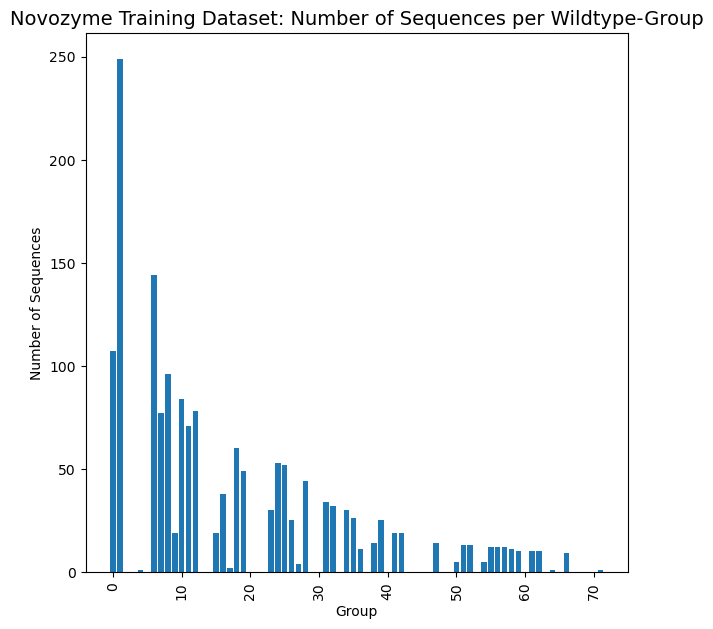

In [13]:
#merge esm_df with wt_group_df on id
comb_df=pd.merge(esm_df, wt_group_df, on=["seq_id", "tm"])
print(comb_df.head())
#print dict of how many rows are in each group
print(comb_df["group"].value_counts())
#make graph of how many rows are in each group
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
plt.tight_layout()
plt.bar(comb_df["group"].value_counts().index,comb_df["group"].value_counts().values)
plt.xlabel("Group")
plt.ylabel("Number of Sequences")
plt.title("Novozyme Training Dataset: Number of Sequences per Wildtype-Group", fontsize=14)
plt.xticks(rotation=90)
plt.show()



In [32]:


def make_af_dict(wt_group_df, af_df):
    #return a dictionary of the wildtype sequences and a representative alphafold model seq_id
    #the wildtype sequences are those that are in the wt_group_df training set that have been screened for pH
    #wt_group_df is the training set of Novozyme screened for pH
    #af_df is the alphafold dataframe from the Novozyme dataset additional info. 
    
    #wt_group_df=>"/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/train_wildtype_groups_ph_6.5_7.5.csv"
    #af_df=>"/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/alpha_fold_df.csv" 

    #how many unique wt sequence in af_df
    wt_list=af_df["af2_sequence"].unique()

    # make dict for how often each sequence in wt_list occurs in comb_df["wwildtype"]
    wt_dict={}
    for i in wt_list:
        wt_dict[i]=0
    #print(wt_dict)
    #count how often each sequence in wt_list occurs in comb_df["wwildtype"]
    for i in wt_group_df.index:
        if wt_group_df["wildtype"][i] in wt_dict.keys():
            wt_dict[wt_group_df["wildtype"][i]]+=1
            
    #print(wt_dict.values())
    #count how many not 0 in list
    count=0
    for i in wt_dict.values():
        if i!=0:
            count+=1
    #print(count)
    #get list of those sequence that are not 0
    wt_list2=[]
    for i in wt_dict.keys():
        if wt_dict[i]!=0:
            wt_list2.append(i)
    #print(wt_list2)
    #get dict of all wt_list2 sequences and their af2id in af_df which have af2_sequence
    af_dict={}
    for i in wt_list2:
        val=af_df[af_df["af2_sequence"]==i]["af2id"].values 
        val=[i.split(":")[1]+"-model_v3.pdb" for i in val]
        af_dict[i]=val[0]#delete [0] if you want list of all AF2 models, not just first one
    swapped_af_dict = {value: key for key, value in af_dict.items()}
    return(af_dict,swapped_af_dict)
    #comb_df=pd.merge(esm_df, wt_group_df, on=["seq_id", "tm"])



Get Esm encoding for the wildtype sequences.

In [33]:
import pickle
(af_dict,swapped_af_dict)=make_af_dict(wt_group_df, af_df)
swapped_af_dict = list(swapped_af_dict.items())
with open("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/af_sequences.pkl", 'wb') as f:
    pickle.dump(swapped_af_dict, f)

In [ ]:
import torch
import esm
import gc
from esm_encoder import embed

!python3 esm_encoder.py "/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/af_sequences.pkl" '/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/esm_af_wt_representedinph6575.csv'

Using cache found in /home/lilian/.cache/torch/hub/facebookresearch_esm_main
AF-A0A828R4Q3-F1-model_v3.pdb
AF-A0A6H0GYV1-F1-model_v3.pdb
AF-A0A7M1TZM4-F1-model_v3.pdb
AF-A0A4V1NSR6-F1-model_v3.pdb
AF-A0A7L6HUW1-F1-model_v3.pdb
AF-A0A263HJ39-F1-model_v3.pdb
AF-A0A5E8G2S9-F1-model_v3.pdb
AF-Q13526-F1-model_v3.pdb
AF-A0A142CN06-F1-model_v3.pdb
AF-B6V3I5-F1-model_v3.pdb
AF-A0A862ZEN2-F1-model_v3.pdb
AF-Q76KE7-F1-model_v3.pdb
AF-A0A610H3S4-F1-model_v3.pdb
AF-A0A1Z4KGD5-F1-model_v3.pdb
AF-A0A6P5DVM1-F1-model_v3.pdb
AF-W8TFD4-F1-model_v3.pdb
AF-A0A742CWP6-F1-model_v3.pdb
AF-Q8RJN5-F1-model_v3.pdb
AF-P00644-F1-model_v3.pdb
AF-A0A6H0WG47-F1-model_v3.pdb
AF-Q7B004-F1-model_v3.pdb
AF-A0A6D2WEP4-F1-model_v3.pdb
AF-A0A0Q0UHS0-F1-model_v3.pdb
AF-P61641-F1-model_v3.pdb
AF-P22505-F1-model_v3.pdb
AF-A0A7U3JW04-F1-model_v3.pdb
AF-A0A6P5CDR1-F1-model_v3.pdb
AF-P28335-F1-model_v3.pdb
AF-P06654-F1-model_v3.pdb
AF-B8NCN3-F1-model_v3.pdb


In [8]:
import ast
import pandas as pd
import numpy as np
af_esm_df=pd.read_csv("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/esm_af_wt_representedinph6575.csv",sep=";", header=None) 
af_esm_df.columns = ["seq_id","esm_WT"] 
for i in af_esm_df.index:
    af_esm_df["esm_WT"][i]=np.array(ast.literal_eval(af_esm_df["esm_WT"][i]))

af_full_esm_df=pd.DataFrame(columns=[str(i) for i in range(1,len(af_esm_df["esm_WT"][i])+1)]+["seq_id"])
for i in af_esm_df.index:
    array_esm=list(af_esm_df["esm_WT"][i])+[af_esm_df["seq_id"][i]]
    for a in range(len(array_esm)):
        af_full_esm_df.loc[i] = array_esm
print(af_full_esm_df.head())
print(af_full_esm_df.shape)
with open("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/full_esm_af_representedinph6575.pkl", 'wb') as f:
    pickle.dump(af_full_esm_df, f)
    

          1         2         3         4         5         6         7  \
0 -0.008570 -0.090419  0.027346 -0.006747 -0.071323 -0.057707 -0.017559   
1 -0.007673  0.002679  0.023867  0.067993 -0.022198 -0.032612  0.009333   
2 -0.029653 -0.087254  0.050139 -0.006680 -0.170848 -0.055899  0.060895   
3 -0.013040  0.047785  0.058830 -0.004417 -0.015472  0.012419 -0.004264   
4 -0.004871 -0.057510  0.007059  0.022040 -0.023391 -0.046598  0.087926   

          8         9        10  ...      1272      1273      1274      1275  \
0 -0.060762 -0.149573 -0.084302  ... -0.017325 -0.063772 -0.097598 -0.043721   
1 -0.140553 -0.017132  0.074612  ... -0.083857 -0.073887  0.013422 -0.026957   
2 -0.141511 -0.027821  0.075410  ... -0.000426 -0.053859  0.006938 -0.070601   
3 -0.018419 -0.054483 -0.095098  ... -0.054778  0.001138  0.020714 -0.028967   
4 -0.032373 -0.046530  0.083717  ... -0.050402 -0.089888 -0.068416 -0.058590   

       1276      1277      1278      1279      1280  \
0 -0.108184  

In [26]:
#make df with seq_id and PCA components for AF2 sequences esm encoded

#open pickle file
import pickle
with open("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/full_esm_af_representedinph6575.pkl", 'rb') as f:
    af_full_esm_df = pickle.load(f)

from sklearn.decomposition import PCA
pca = PCA(n_components=16)
components = pca.fit_transform(af_full_esm_df[[str(i) for i in range(1,af_full_esm_df.shape[1])]])
af_pca_df=pd.DataFrame(components, columns=["AF_PCA"+str(i) for i in range (1,17)])
#merge pca_df with esm_df
af_pca_df=pd.concat([af_pca_df,af_full_esm_df[["seq_id"]]],axis=1)
print(af_pca_df.head())

    AF_PCA1   AF_PCA2   AF_PCA3   AF_PCA4   AF_PCA5   AF_PCA6   AF_PCA7  \
0 -0.809863 -0.928991  0.109805 -0.674549 -0.126880  0.013143 -0.413341   
1  1.055535 -0.313958 -0.067410 -0.380005 -0.634327  0.021397 -0.275354   
2 -1.174025 -1.390746 -0.005401  1.263743  0.710501 -0.206631 -0.068840   
3  3.492170  0.237537 -0.520261 -0.181418  0.825608  0.859778  0.078024   
4 -1.354155  0.084525 -0.216143 -0.985913 -0.030260  0.143997  0.079214   

    AF_PCA8   AF_PCA9  AF_PCA10  AF_PCA11  AF_PCA12  AF_PCA13  AF_PCA14  \
0 -0.198304 -0.198953  0.084123  0.235460 -0.023638 -0.143975  0.333242   
1  0.210502  0.361797 -0.033335  0.021242 -0.466974 -0.468685 -0.365217   
2  0.304193 -0.274189 -0.202438 -0.114677 -0.366326 -0.155316  0.097367   
3 -0.453154 -0.439276  0.078236  0.448526 -0.130923  0.227724 -0.141372   
4 -0.196550 -0.575733  0.268629 -0.431809 -0.019210 -0.090890  0.046908   

   AF_PCA15  AF_PCA16                         seq_id  
0 -0.019262 -0.074576  AF-A0A828R4Q3-F1-mod

In [23]:
#open pickle file
import pickle
with open("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/seq_representations_ph6575_fullesm.csv", 'rb') as f:
    full_esm_df = pickle.load(f)
    
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
components = pca.fit_transform(full_esm_df[[str(i) for i in range(1,full_esm_df.shape[1]-1)]])
pca_df=pd.DataFrame(components, columns=["PCA"+str(i) for i in range (1,17)])
pca_df=pd.concat([pca_df,full_esm_df[["id", "tm"]]],axis=1)
print(pca_df.head())



       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  3.118627  1.721113  0.162492 -0.523890 -0.080289  0.163852 -0.139700   
1  3.072117  1.714718  0.166676 -0.535819 -0.073116  0.162929 -0.128553   
2  3.072117  1.714718  0.166676 -0.535819 -0.073116  0.162929 -0.128553   
3  3.027825  1.699021  0.153334 -0.538319 -0.086955  0.176290 -0.135005   
4  3.026874  1.692608  0.147403 -0.541236 -0.083564  0.177815 -0.135568   

       PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0 -0.447223 -0.382262  0.264563 -0.242261 -0.079842 -0.023912  0.145269   
1 -0.457673 -0.390487  0.264723 -0.242203 -0.075259 -0.020723  0.146906   
2 -0.457673 -0.390487  0.264723 -0.242203 -0.075259 -0.020723  0.146906   
3 -0.458501 -0.387005  0.265101 -0.251639 -0.081319 -0.019015  0.129570   
4 -0.461148 -0.390950  0.268681 -0.246340 -0.083219 -0.020077  0.135522   

      PCA15     PCA16       id    tm  
0 -0.076442  0.030514  18023.0  62.9  
1 -0.071307  0.02626

(1182, 36)
Index(['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9',
       'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'seq_id',
       'tm', 'wildtype', 'protein_sequence', 'AF_PCA1', 'AF_PCA2', 'AF_PCA3',
       'AF_PCA4', 'AF_PCA5', 'AF_PCA6', 'AF_PCA7', 'AF_PCA8', 'AF_PCA9',
       'AF_PCA10', 'AF_PCA11', 'AF_PCA12', 'AF_PCA13', 'AF_PCA14', 'AF_PCA15',
       'AF_PCA16'],
      dtype='object')
107     48.167068
108     48.167068
109     48.167068
110     48.167068
111     48.167068
          ...    
1644    37.000000
1645    37.000000
1646    37.000000
1647    37.000000
1648    37.000000
Name: tm, Length: 1182, dtype: float64
107     50.9
108     50.1
109     48.9
110     51.1
111     52.5
        ... 
1644    37.0
1645    37.0
1646    37.0
1647    37.0
1648    37.0
Name: tm, Length: 1182, dtype: float64


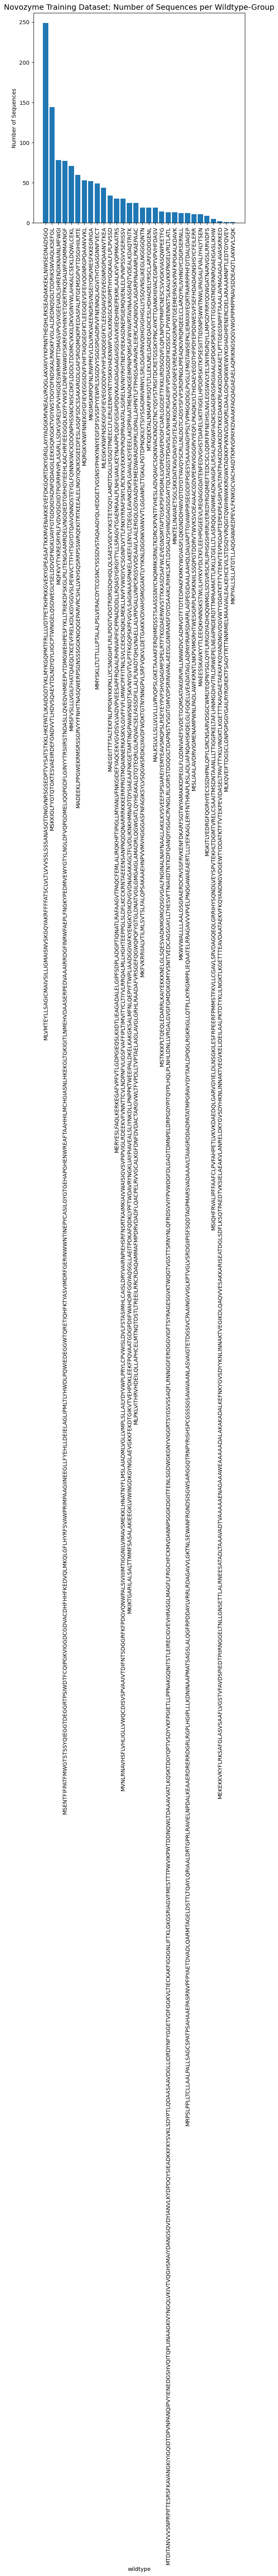

In [105]:
#now we need to merge pca_df and af_pca_df. the id of the sequence needs to be matched to the AF_seq_id.
#need to look up af2_sequence ID for WT id
#add new column that takes values from seq_id and looks up the wildtype sequence in af_dict

wt_group_df=pd.read_csv("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/train_wildtype_groups_ph_6.5_7.5.csv")
af_df=pd.read_csv("/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/alpha_fold_df.csv")
(af_dict,swapped_af_dict)=make_af_dict(wt_group_df, af_df)
#{'AF-A0A828R4Q3-F1-model_v3.pdb': 'MISLIAALAVDRVIGMENA


#add wldtype sequence to pca_df
pca_df=pca_df.rename(columns={"id": "seq_id"})
new_pca_df=pd.merge(pca_df, wt_group_df[["seq_id", "tm","wildtype", "protein_sequence"]], on=["seq_id", "tm"])
#print(new_pca_df.head())
#add af2 sequence to af_pca_df
af_pca_df=af_pca_df.rename(columns={"seq_id": "af2id"})
af_df["af2id"]=[i.split(":")[1]+"-model_v3.pdb" for i in af_df["af2id"]]
new_af_pca_df=pd.merge(af_pca_df, af_df[['af2id','af2_sequence',]], on=["af2id"])


#drop rows with nan values
new_pca_df=new_pca_df.dropna()
new_af_pca_df=new_af_pca_df.dropna()

#if new_pca_df has a wildtype found in new_af_pca_df then add the AF_PCA values to new_pca_df
cols_to_add=["AF_PCA"+str(i) for i in range(1,17)]
for col in cols_to_add:
    new_pca_df[col] = np.nan
for i in new_pca_df.index:
    #find lines in new_af_pca_df that have the same wildtype sequence as in new_pca_df
    WT_seq=new_pca_df["wildtype"][i]
    
    if WT_seq in list(new_af_pca_df["af2_sequence"]) == False:
        print("here")
    for index in new_af_pca_df.index:
        AF_seq=new_af_pca_df["af2_sequence"][index]
        if WT_seq in AF_seq:
            if WT_seq == AF_seq:
                new_pca_df.loc[i, cols_to_add] = new_af_pca_df.loc[index, cols_to_add]
            else:
                print("here")
#print all rows that have nan values for AF_PCA1

#filter new_pca_df for rows that have values for AF_PCA1   ----> 1649-1182= 467 rows don't have a wildtype sequence in the AF2 dataset
new_pca_df=new_pca_df.dropna(subset=["AF_PCA1"])
print(new_pca_df.shape)
print(new_pca_df.columns)
#print(new_pca_df.head())

#make graph of how many rows are in each group
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
plt.tight_layout()
plt.bar(new_pca_df["wildtype"].value_counts().index,new_pca_df["wildtype"].value_counts().values)
plt.xlabel("wildtype")
plt.ylabel("Number of Sequences")
plt.title("Novozyme Training Dataset: Number of Sequences per Wildtype-Group", fontsize=14)
plt.xticks(rotation=90)
#plt.show()

#as we don't have the tm of the af WT sturcture, we will transform the tm into dTm by subtracting the mean
#get mean tm of each group and subtract from tm in each row of that group
#filter new_pca_df by wildtype group size over 20
new_pca_df=new_pca_df[new_pca_df["wildtype"].isin(new_pca_df["wildtype"].value_counts()[new_pca_df["wildtype"].value_counts()>20].index)]
base = new_pca_df.groupby('wildtype').tm.transform('mean')
new_pca_df['dTm'] = new_pca_df['tm']- base

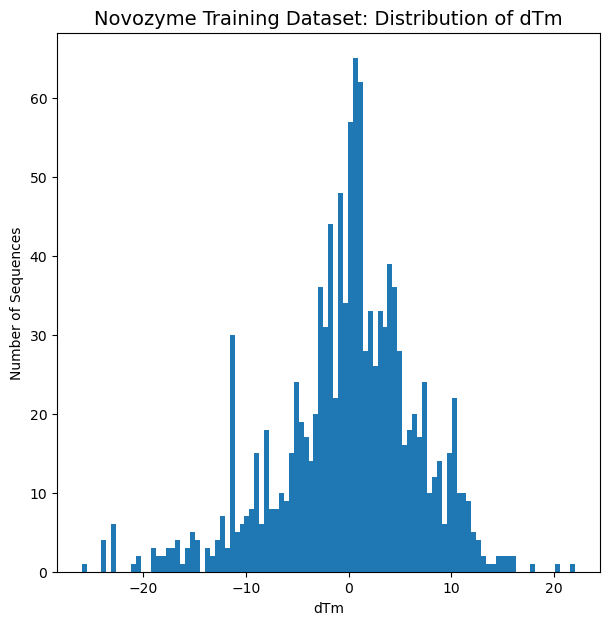

In [111]:
#graph distribution of dTm
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
plt.tight_layout()
plt.hist(new_pca_df["dTm"],bins=100)
plt.xlabel("dTm")
plt.ylabel("Number of Sequences")
plt.title("Novozyme Training Dataset: Distribution of dTm", fontsize=14)
plt.show()



In [ ]:
"""af_dict,swapped_af_dict=make_af_dict(wt_group_df, af_df)
wt_group_df="/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/train_wildtype_groups_ph_6.5_7.5.csv": seq_id  protein_sequence   pH data_source  tm    x  group, wildtype
esm_df="/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/seq_representations_ph6575.csv": id  tm  esm  
full_esm_df="/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/seq_representations_ph6575_fullesm.csv": 1 2...1280 id  tm
af_df="/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/alpha_fold_df.csv"  'af2id', 'metadata', 'af2_sequence', 'cif', 'confidence', 'err'
comb_df=pd.merge(esm_df, wt_group_df, on=["seq_id", "tm"])  seq_id  protein_sequence   pH data_source  tm    x  group, wildtype  esm
swapped_af_dict="/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/af_sequences.pkl" list of representative af_seq_id and sequence; used for making af2 esm encoding
af_esm_df="/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/esm_af_wt_representedinph6575.csv"  seq_id  esm_WT
af_full_esm_df="/home/lilian/TCR_Graphs/Novozyme_data/AF_WT/full_esm_af_representedinph6575.pkl" 1 2...1280 af_seq_id"""

In [121]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

class SequenceDataset(Dataset):
    def __init__(self, wt_embeddings, mut_embeddings, temp_diffs):
        self.wt_embeddings = wt_embeddings
        self.mut_embeddings = mut_embeddings
        self.temp_diffs = temp_diffs

    def __len__(self):
        return len(self.temp_diffs)

    def __getitem__(self, idx):
        wt_emb = self.wt_embeddings[idx]
        mut_emb = self.mut_embeddings[idx]
        temp_diff = self.temp_diffs[idx]
        return (wt_emb, mut_emb), temp_diff

# Assuming you have the following data

wt_embeddings = [new_pca_df["PCA"+str(i)].values for i in range(1,17)]  # your list of wildtype embeddings
wt_embeddings= np.reshape(wt_embeddings, (-1, 16))
mut_embeddings = [new_pca_df["AF_PCA"+str(i)].values for i in range(1,17)]  # your list of mutant embeddings
mut_embeddings= np.reshape(mut_embeddings, (-1, 16))
temp_diffs = [new_pca_df["dTm"].values]  # your list of temperature differences
temp_diffs= np.reshape(temp_diffs, (-1, 1))
# Split the data into training and testing sets
wt_train, wt_test, mut_train, mut_test, temp_train, temp_test = train_test_split(
    wt_embeddings, mut_embeddings, temp_diffs, test_size=0.2, random_state=42
)

# Create datasets
train_dataset = SequenceDataset(wt_train, mut_train, temp_train)
test_dataset = SequenceDataset(wt_test, mut_test, temp_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Now, train_loader and test_loader can be used in your training and testing loops, respectively.


In [128]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class RegressionModel(nn.Module):
    def __init__(self, embedding_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(embedding_dim * 2, 512)  # We concatenate WT and mutated embeddings
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)  # Output is a single value: the difference in melting temperature

    def forward(self, x_wt, x_mut):
        # Concatenate the embeddings of the WT and mutated sequences
        x = torch.cat((x_wt, x_mut), dim=1)  # Concatenation dimension may vary based on your data format
        # Forward pass
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)  # No activation function here because this is regression
        return x

# Assume `embedding_dim` is the size of the embeddings from ESM
model = RegressionModel(embedding_dim=16) # for ESM, embedding_dim might be different
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs=5000
# Training loop
for epoch in range(num_epochs):
    for i, data in enumerate(train_loader):
        (input_wt, input_mut), target_diff = data  # Assuming your data loader provides the pairs of embeddings and the target difference in melting temperature
        optimizer.zero_grad()
        input_wt=torch.tensor(input_wt, dtype=torch.float32)
        input_mut=torch.tensor(input_mut, dtype=torch.float32)
        target_diff=torch.tensor(target_diff, dtype=torch.float32)
        
        output = model(input_wt, input_mut)
        loss = criterion(output, target_diff)
        loss.backward()
        optimizer.step()

/tmp/ipykernel_1234933/317183390.py:33: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_1234933/317183390.py:34: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_1234933/317183390.py:35: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [ ]:
import torch
#v1 is trained 5000 epochs, ph 6.5-7.5, only groups above 20 are considered
torch.save(model.state_dict(), 'model_v1.pth')


In [127]:
from scipy.stats import spearmanr
model.eval()
with torch.no_grad():
    all_predictions = []
    all_labels = []
    for i, data in enumerate(train_loader):
        (input_wt, input_mut), target_diff = data  # Assuming your data loader provides the pairs of embeddings and the target difference in melting temperature
        optimizer.zero_grad()
        input_wt=torch.tensor(input_wt, dtype=torch.float32)
        input_mut=torch.tensor(input_mut, dtype=torch.float32)
        target_diff=torch.tensor(target_diff, dtype=torch.float32)
        predictions = model(input_wt, input_mut)
        all_predictions.append(predictions.cpu())
        all_labels.append(target_diff.cpu())
        
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert lists to tensors
all_predictions = torch.cat(all_predictions, dim=0)
all_labels = torch.cat(all_labels, dim=0)

# Calculate error metrics
spearman_corr, _ = spearmanr(all_predictions, all_labels)
print(f"Spearman's rank correlation coefficient: {spearman_corr}")
mae = mean_absolute_error(all_labels.numpy(), all_predictions.numpy())
mse = mean_squared_error(all_labels.numpy(), all_predictions.numpy())
r2 = r2_score(all_labels.numpy(), all_predictions.numpy())

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Absolute Error: 2.6811838150024414
Mean Squared Error: 18.51456069946289
R-squared: 0.6157540117833296


/tmp/ipykernel_1234933/544286822.py:8: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_1234933/544286822.py:9: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_1234933/544286822.py:10: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

